In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /trash_dataset

In [ ]:
!unrar x '/content/drive/MyDrive/Для маги/Хакатон смерти/trash_dataset2.rar'

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracting  trash_dataset/train/safe/GantMan_9C8B141B-AF35-4067-A1ED-6CA123CA09C5.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8C3626-69B4-482E-8B10-03143FDDDC0D.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8CE260-A309-4D7C-8373-E76A88291086.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8D2493-CCA6-4A7D-999D-139680ADCE23.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8D738C-9B02-422B-88CA-584818F2CD67.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8EC135-4ACC-472E-9E35-4D976053C61C.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C8FD699-B19C-439F-B1E3-7BF52DBE8E20.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C901B76-F79B-4609-9AC5-45E17587695F.jpg      41%  OK 
Extracting  trash_dataset/train/safe/GantMan_9C9169AA-5B50-4

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transformations = transforms.Compose([
transforms.Resize([230,230]),
transforms.CenterCrop(230),
transforms.ToTensor(),
transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [ ]:
train_set = datasets.ImageFolder("/content/trash_dataset/train", transform = transformations)
test_set = datasets.ImageFolder("/content/trash_dataset/test", transform = transformations)

# train_set = datasets.ImageFolder("final_dataset_nood/train", transform = transformations)
# test_set = datasets.ImageFolder("final_dataset_nood/test", transform = transformations)

In [ ]:
sizes_datasets = {'train_data': len(train_set), 'validation_data': len(test_set)}

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size =16, shuffle=True)

In [ ]:
loaders_data = {'train_data': train_loader, 'validation_data': test_loader}

In [ ]:
# trash, safe = 0,0
# for ind, el in train_set:
#     if el==0:safe+=1
#     elif el==1:trash+=1

# print(trash, safe)

In [ ]:
obr = transforms.Compose([transforms.ToPILImage()])
img_collect=[]
count = 0
for i,l in train_loader:
    collect = []
    print(l)
    for img in i:
        collect.append(obr(img))
    img_collect.append(collect)
    if count > 2:
        break
    count+=1

tensor([1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2])
tensor([1, 1, 2, 1, 1, 1, 3, 1, 1, 4, 1, 3, 2, 1, 3, 1])
tensor([3, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1])
tensor([2, 0, 1, 1, 3, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 3])


In [ ]:
from __future__ import print_function, division

import torch

import torch.nn as nn

import torch.optim as optim

from torch.optim import lr_scheduler, Adam

import numpy as np

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt

import time

import os

import copy

plt.ion()   # This is the interactive mode

In [ ]:
class_names = train_set.classes

In [ ]:
class_names

['meat', 'safe', 'safe_drow', 'trash', 'trash_drow']

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def model_training(res_model, criterion, optimizer, number_epochs=25):
    since = time.time()
    best_resmodel_wts = copy.deepcopy(res_model.state_dict())
    best_accuracy = 0.0
    for epochs in range(number_epochs):
        print('Epoch {}/{}'.format(epochs, number_epochs - 1))
        print('-' * 10)
        for phase in ['train_data', 'validation_data']: ## Here each epoch is having a training and validation phase
            if phase == 'train_data':
                res_model.train()  ## Here we are setting our model to training mode
            else:
                res_model.eval()   ## Here we are setting our model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            answ = np.array([])
            pred = np.array([])
            for inputs, labels in loaders_data[phase]: ## Iterating over data.
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad() ## here we are making the gradients to zero
                with torch.set_grad_enabled(phase == 'train_data'): ## forwarding and then tracking the history if only in train
                    outputs = res_model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train_data':
                        loss.backward()
                        optimizer.step()
                    answ = np.append(answ,np.array(labels.cpu()))
                    pred = np.append(pred,np.array(preds.cpu()))


                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            '''if phase == 'train':
                scheduler.step()'''


            ConfusionMatrixDisplay(confusion_matrix(answ,pred),display_labels=
                           ['meat', 'safe', 'safe_drow', 'trash', 'trash_drow']).plot()
            plt.show()
            epoch_loss = running_loss / sizes_datasets[phase]
            epoch_acc = running_corrects.double() / sizes_datasets[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))



            if phase == 'validation_data' and epoch_acc > best_accuracy: ## deep copy the model

                best_accuracy = epoch_acc

                best_resmodel_wts = copy.deepcopy(res_model.state_dict())
    print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_accuracy))
     # load best model weights

    res_model.load_state_dict(best_resmodel_wts)

    return res_model

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha,(float,int,long)): self.alpha = torch.Tensor([alpha,1-alpha])
        if isinstance(alpha,list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim()>2:
            input = input.view(input.size(0),input.size(1),-1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1,2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1,input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1,1)

        logpt = F.log_softmax(input)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())

        if self.alpha is not None:
            if self.alpha.type()!=input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0,target.data.view(-1))
            logpt = logpt * Variable(at)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average: return loss.mean()
        else: return loss.sum()

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
model = torchvision.models.mobilenet_v2(pretrained=True)

# num_ftrs = model.fc.in_features
import timm

# model = timm.create_model('inception_resnet_v2', pretrained=True, num_classes=2)

model.classifier[1] = nn.Linear(1280, 5)
# nn.Sequential(nn.Linear(num_ftrs, 5),
#           nn.Softmax())

model = model.to(device)

criterion = nn.CrossEntropyLoss()

finetune_optim = optim.Adam(model.parameters(),lr=10e-4)
# model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 143MB/s]


Epoch 0/4
----------


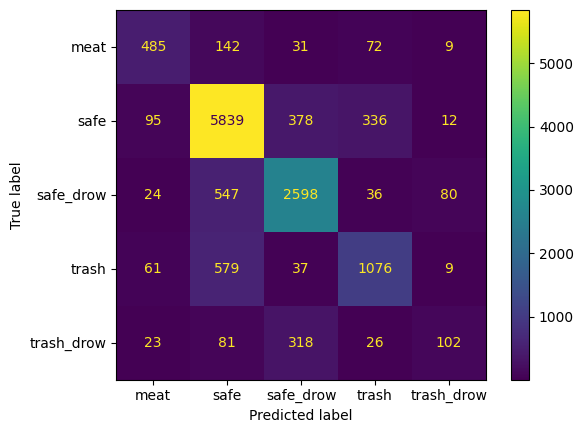

train_data Loss: 0.6310 Acc: 0.7772


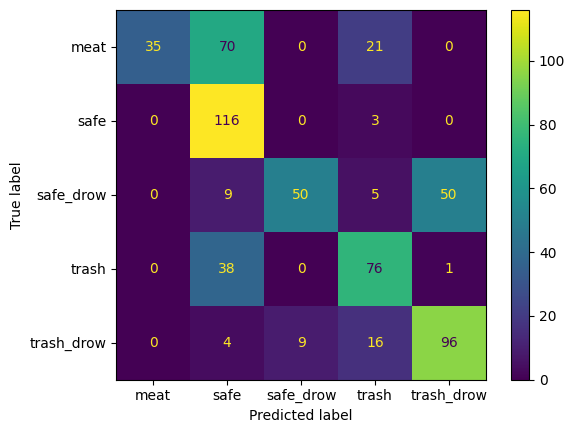

validation_data Loss: 0.8820 Acc: 0.6227
Epoch 1/4
----------


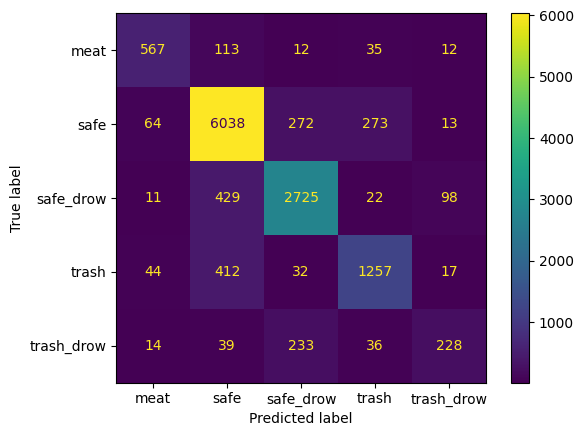

train_data Loss: 0.4730 Acc: 0.8322


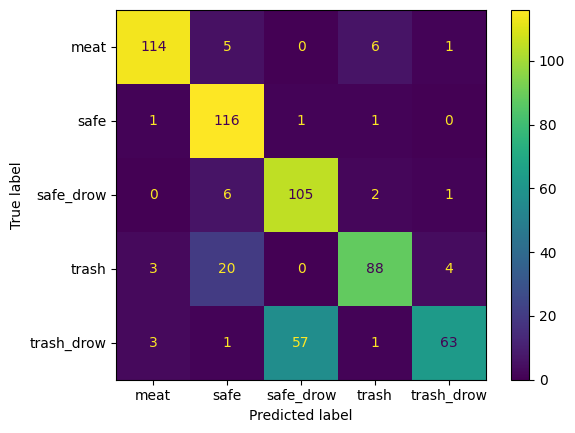

validation_data Loss: 0.4641 Acc: 0.8114
Epoch 2/4
----------


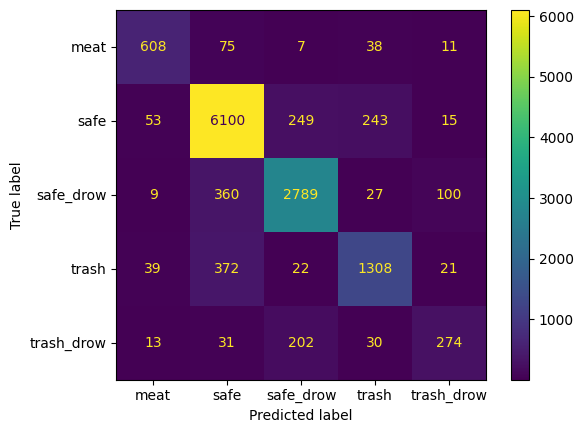

train_data Loss: 0.4273 Acc: 0.8525


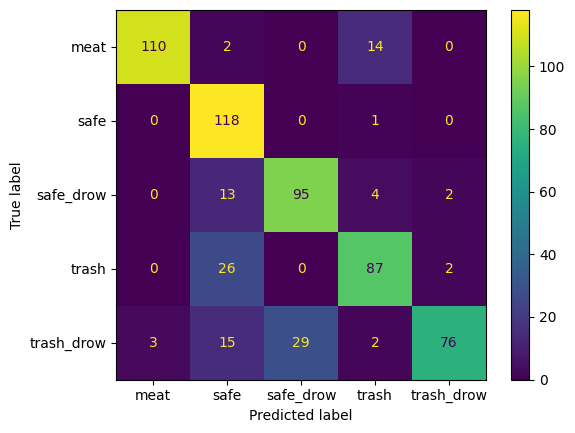

validation_data Loss: 0.5041 Acc: 0.8114
Epoch 3/4
----------


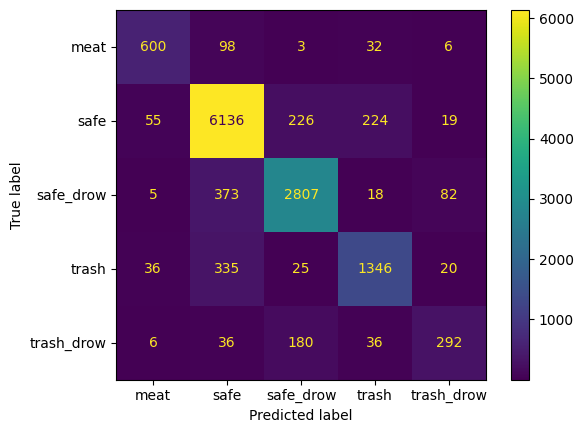

train_data Loss: 0.3938 Acc: 0.8603


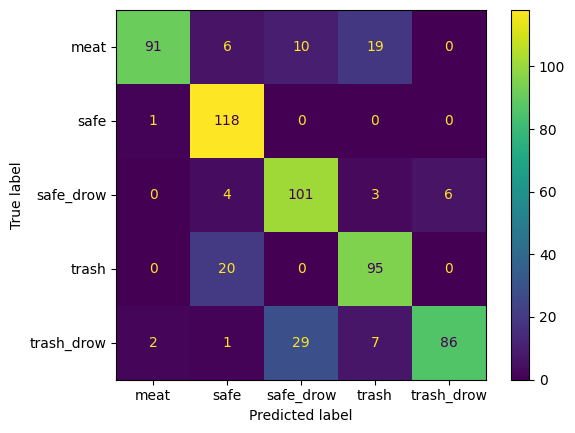

validation_data Loss: 0.5197 Acc: 0.8197
Epoch 4/4
----------


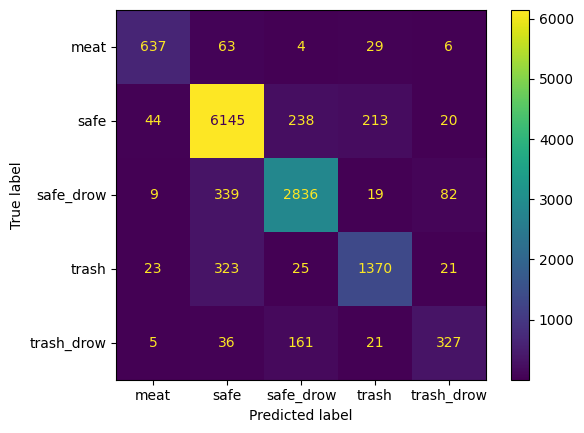

train_data Loss: 0.3595 Acc: 0.8707


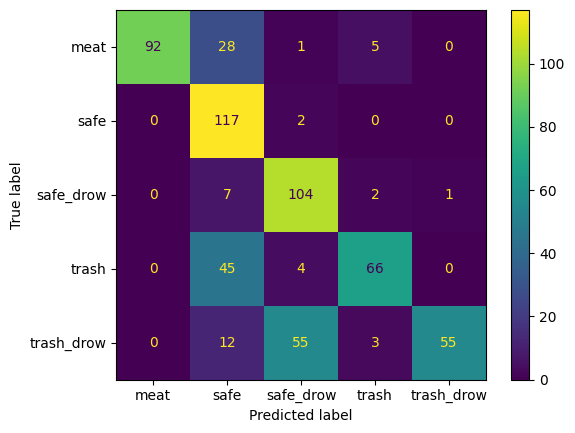

validation_data Loss: 0.7930 Acc: 0.7245

Training complete in 10m 35s
Best val Acc: 0.819699


In [ ]:
finetune_model = model_training(model, criterion, finetune_optim,
                       number_epochs=5)

In [ ]:
torch.save(model.state_dict(), 'TreshNet.pth')